# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1676854957499.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,02/17/2023,4079.09,--,4077.39,4081.51,4047.95
1,02/16/2023,4090.41,--,4114.75,4136.54,4089.49
2,02/15/2023,4147.60,--,4119.50,4148.11,4103.98
3,02/14/2023,4136.13,--,4126.70,4159.77,4095.01
4,02/13/2023,4137.29,--,4096.62,4138.90,4092.67
...,...,...,...,...,...,...
2538,02/25/2013,1487.85,--,1515.60,1525.84,1487.85
2539,02/22/2013,1515.60,--,1502.42,1515.64,1502.42
2540,02/21/2013,1502.42,--,1511.95,1511.95,1497.29
2541,02/20/2013,1511.95,--,1530.94,1530.94,1511.41


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2543.000000,2543.000000,2543.000000,2543.000000
mean,2767.294251,2748.726827,2763.663653,2732.573976
std,872.988960,909.396427,916.129972,902.101765
min,1487.850000,0.000000,0.000000,0.000000
25%,2059.295000,2055.565000,2066.550000,2043.535000
50%,2616.100000,2614.690000,2638.670000,2593.060000
75%,3336.610000,3339.495000,3355.230000,3322.905000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2519.000000,2519.000000,2519.000000,2519.000000
mean,2775.375459,2774.915570,2789.994708,2758.608821
std,873.031772,873.031451,879.659634,865.849659
min,1487.850000,1487.850000,1498.990000,1485.010000
25%,2062.330000,2061.735000,2072.380000,2049.650000
50%,2634.560000,2630.860000,2650.930000,2606.360000
75%,3350.220000,3351.810000,3369.025000,3329.035000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2542
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2519 non-null   object 
 1   Close/Last  2519 non-null   float64
 2   Volume      2519 non-null   object 
 3   Open        2519 non-null   float64
 4   High        2519 non-null   float64
 5   Low         2519 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.8+ KB


In [5]:
df.shape

(2519, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

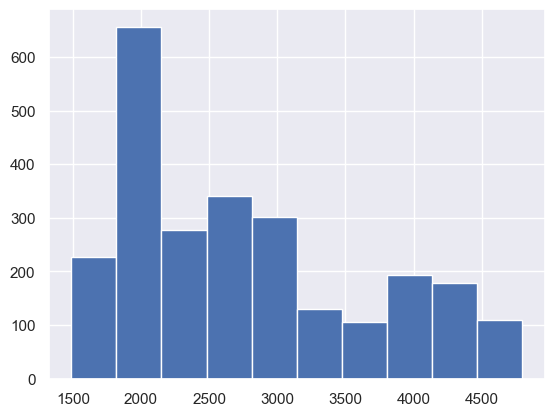

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4079.09

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2775.375458515293

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.0317721512093

In [11]:
sigma1 = close_mean + close_sd
sigma1

3648.407230666502

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4521.439002817711

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

4957.954888893317

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2542
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2519 non-null   datetime64[ns]
 1   Close/Last  2519 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-02-19 to 2023-02-17')

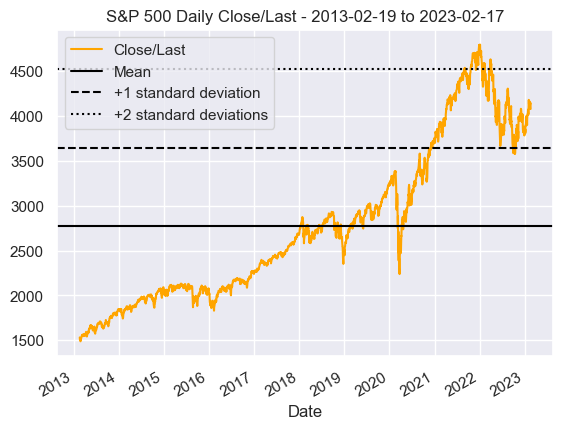

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-02-19 to 2023-02-17')

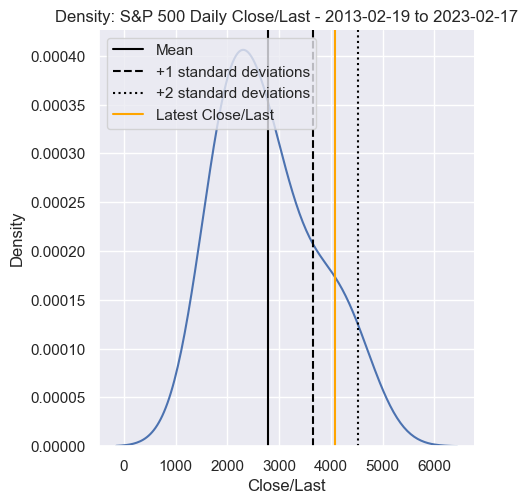

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.493318551594367

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results